# Binance Weekly Graph Generator

#### Load Dependencies

In [140]:
import json
import os 
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import requests
from binance.client import Client
from dotenv import load_dotenv
from matplotlib import pyplot  as plt




#### Connect To Binance Rest API 

In [141]:
load_dotenv()
client=Client(os.getenv('api_key'), os.getenv('secret'))


#### Pull Required Data Using API Then Save Them To The DataFrame

In [142]:
sym = input('Type the trading pair you would want to look at its graph as following syntax : ETHUSDT\n')
sym = sym.upper()
frame = pd.DataFrame(client.get_klines(symbol=sym,interval = '1w'))
frame = frame.iloc[:,:6]  
frame.columns = ['Time','Open','High','Low','Close','Volume']
frame=frame.set_index('Time')
frame.index=pd.to_datetime(frame.index,unit='ms')
frame=frame.astype('float')
frame = frame.dropna()

### Implement WBTS Indicator 

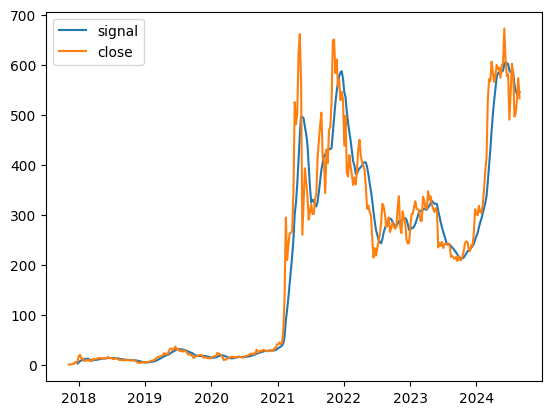

In [143]:
# Get Signal 
frame['signal'] = frame['Close'].rolling(8).mean()
# Remove Null Values From The Signal
frame['signal'] = frame['signal'].dropna()
plt.plot(frame['signal'])
plt.plot(frame['Close'])

plt.legend(['signal','close'])
plt.show()



In [145]:

fig = go.Figure(data=go.Ohlc(x=frame.index,
                    open=frame['Open'],
                    high=frame['High'],
                    low=frame['Low'],
                    close=frame['Close'],
                    name='Close',
                    ))
fig.update_layout(title = f'{sym} Weekly Chart')
fig.add_trace(go.Scatter(x=frame.index, y=frame.signal,line=dict(color = 'purple', width = 2),name='Signal'))

display(fig)
